In [1]:
import pandas as pd
df = pd.read_csv("../data/data.csv")
df = df.dropna(subset=['Attrition'])

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})


df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# missing values
df.isnull().sum()



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#drop non importants columns
df = df.drop(columns=["EmployeeNumber","StandardHours","EmployeeCount","Over18"], errors="ignore")

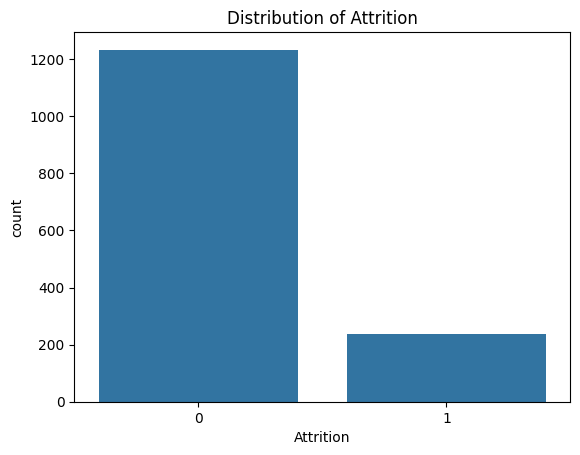

In [ ]:
# countplot to see if data equilibred
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Attrition", data=df)
plt.title("Distribution of Attrition")
plt.show()


In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols=num_cols.drop(['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance'], errors="ignore")

In [6]:
df[num_cols].describe()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,65.891156,2.063946,6502.931293,14313.103401,2.693197,15.209524,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,20.329428,1.106940,4707.956783,7117.786044,2.498009,3.659938,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,48.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,66.000000,2.000000,4919.000000,14235.500000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
corr= df[num_cols].corr()
print("Correlation with Attrition \n", corr['Attrition'].sort_values(ascending=False))

Correlation with Attrition 
 Attrition                  1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
HourlyRate                -0.006846
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
DailyRate                 -0.056652
TrainingTimesLastYear     -0.059478
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition, dtype: float64


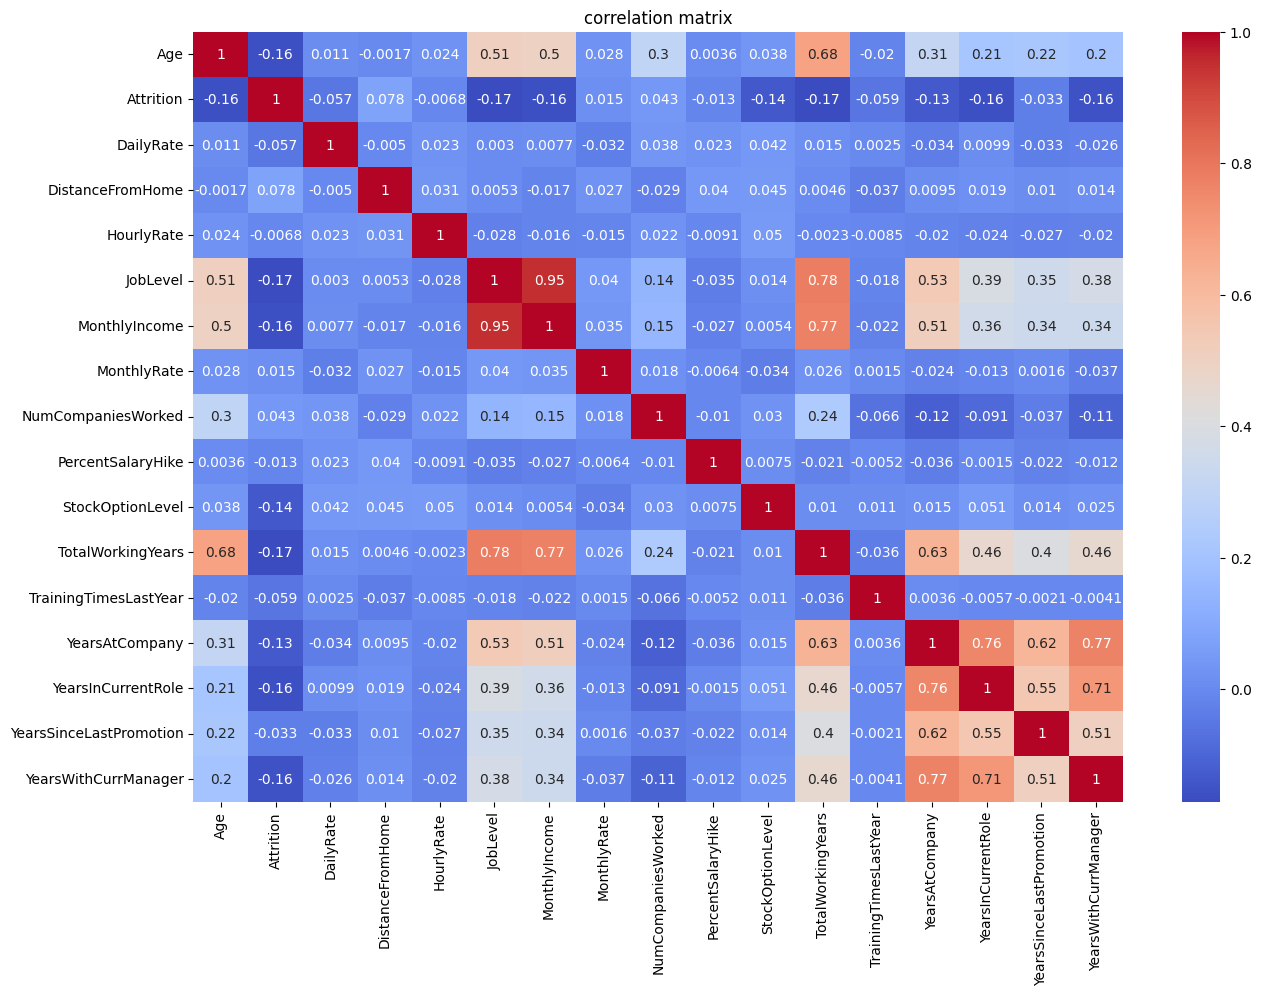

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("correlation matrix")
plt.show()

In [ ]:
#Drop non importants columns
df = df.drop(columns=["YearsSinceLastPromotion","TrainingTimesLastYear","PercentSalaryHike","NumCompaniesWorked","MonthlyRate","HourlyRate","DistanceFromHome","DailyRate"], errors="ignore")

In [11]:
df.to_csv("../data/cleaned_data.csv",index=False)